In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_peta = pd.read_csv('Downloads/Petabencana.csv', encoding="ISO-8859-1")

In [4]:
df_peta.head()

,pkey,date,time,source,status,url,image_url,disaster_type,report_dat,tags,...,ID_Desa,ID_Kec,ID_Kab,ID_Prov,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
0,94941,01/01/2020,0:03:02,grasp,confirmed,2042596d-b551-4ef2-803d-1ee964cf2278,https://images.petabencana.id/2042596d-b551-4e...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",...,3.174020e+09,3174020.0,3174.0,31.0,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.76866,-6.16978
1,95061,01/01/2020,0:43:02,grasp,confirmed,5a0ad45f-7020-43b7-882f-672487ebc6d8,https://images.petabencana.id/5a0ad45f-7020-43...,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.275061e+09,3275061.0,3275.0,32.0,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.97870,-6.17944
2,95062,01/01/2020,1:14:53,grasp,confirmed,e065b40d-2084-48d6-b42f-1f98cb33e4cc,NaN,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",...,3.172060e+09,3172060.0,3172.0,31.0,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.89100,-6.23449
3,95063,01/01/2020,1:15:08,grasp,confirmed,7cb26903-b1c8-4be7-8b81-7014c8a83fbd,https://images.petabencana.id/7cb26903-b1c8-4b...,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.216061e+09,3216061.0,3216.0,32.0,Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.16189,-6.30170
4,95064,01/01/2020,1:18:03,grasp,confirmed,570d2cb8-d5b6-404f-86ef-8a2a0d27f391,https://images.petabencana.id/570d2cb8-d5b6-40...,flood,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...","{ ""district_id"": ""3173"", ""local_area_id"": ""193...",...,3.173060e+09,3173060.0,3173.0,31.0,Cempaka Baru,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.86092,-6.16859


In [5]:
print(df_peta.isnull().sum())

pkey                0
date                0
time                0
source              0
status              0
url               665
image_url         901
disaster_type       0
report_dat        780
tags                0
title            4047
text              405
ID_Desa             8
ID_Kec              8
ID_Kab              8
ID_Prov             8
Desa                8
Kecamatan           8
Kabupaten           7
Provinsi            7
long                0
lat                 0
dtype: int64


In [6]:
df_peta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pkey           4235 non-null   int64  
 1   date           4235 non-null   object 
 2   time           4235 non-null   object 
 3   source         4235 non-null   object 
 4   status         4235 non-null   object 
 5   url            3570 non-null   object 
 6   image_url      3334 non-null   object 
 7   disaster_type  4235 non-null   object 
 8   report_dat     3455 non-null   object 
 9   tags           4235 non-null   object 
 10  title          188 non-null    object 
 11  text           3830 non-null   object 
 12  ID_Desa        4227 non-null   float64
 13  ID_Kec         4227 non-null   float64
 14  ID_Kab         4227 non-null   float64
 15  ID_Prov        4227 non-null   float64
 16  Desa           4227 non-null   object 
 17  Kecamatan      4227 non-null   object 
 18  Kabupate

In [7]:
df_bnpb=pd.read_csv('Downloads/BNPB.csv', sep=';', header=1)

In [8]:
df_bnpb.head()

,No.,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Fasum Rusak
0,1,1601,31/12/2021,BANJIR,Kec. Lubuk Batang Ds. Gunung Meraksa,OGAN KOMERING ULU,SUMATERA SELATAN,NaN,● Dipicu oleh hujan dengan intensitas tinggi d...,0,0,0,0,0
1,2,1111,31/12/2021,BANJIR,Kec. Dewantara Gp. Tambon Tunong Gp. Uteun ge...,ACEH UTARA,ACEH,NaN,● Dipicu oleh hujan dengan intensitas tinggi d...,3,0,0,1,0
2,3,1213,31/12/2021,BANJIR,Kec. Pematang Jaya Ds. Damar Condong,LANGKAT,SUMATERA UTARA,NaN,● Dipicu oleh dengan intensitas curah hujan ya...,0,0,0,0,0
3,4,1221,31/12/2021,BANJIR,● Kec. Batang Lobu Sutam - Ds. Tanjung Baru - ...,PADANG LAWAS,SUMATERA UTARA,NaN,Dipicu hujan deras dengan durasi panjang menga...,0,0,0,637,1
4,5,3374,31/12/2021,BANJIR,Kec. Gayamsari Kel. Tambakrejo Kel. Kaligawe K...,KOTA SEMARANG,JAWA TENGAH,NaN,Dipicu hujan dengan intensitas tinggi di wilay...,0,0,0,0,0


In [9]:
df_bnpb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   No.                      2968 non-null   int64 
 1   ID Kabupaten             2968 non-null   int64 
 2   Tanggal Kejadian         2968 non-null   object
 3   Kejadian                 2968 non-null   object
 4   Lokasi                   2936 non-null   object
 5   Kabupaten                2968 non-null   object
 6   Provinsi                 2968 non-null   object
 7   Kronologi & Dokumentasi  234 non-null    object
 8   Penyebab                 2486 non-null   object
 9   Meninggal                2968 non-null   int64 
 10  Hilang                   2968 non-null   int64 
 11  Terluka                  2968 non-null   int64 
 12  Rumah Rusak              2968 non-null   int64 
 13  Fasum Rusak              2968 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 324

In [10]:
df_bencana=df_bnpb.assign(korban_jiwa = df_bnpb["Meninggal"] + df_bnpb["Hilang"]+ df_bnpb["Terluka"],kerusakan=df_bnpb["Rumah Rusak"] + df_bnpb["Fasum Rusak"])

In [11]:
df_bencana.isnull().sum()

No.                           0
ID Kabupaten                  0
Tanggal Kejadian              0
Kejadian                      0
Lokasi                       32
Kabupaten                     0
Provinsi                      0
Kronologi & Dokumentasi    2734
Penyebab                    482
Meninggal                     0
Hilang                        0
Terluka                       0
Rumah Rusak                   0
Fasum Rusak                   0
korban_jiwa                   0
kerusakan                     0
dtype: int64

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
std=StandardScaler()  
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [13]:
df = df_bencana.set_index("ID Kabupaten")
df.head()

,No.,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Fasum Rusak,korban_jiwa,kerusakan
ID Kabupaten,,,,,,,,,,,,,,,
1601,1,31/12/2021,BANJIR,Kec. Lubuk Batang Ds. Gunung Meraksa,OGAN KOMERING ULU,SUMATERA SELATAN,NaN,● Dipicu oleh hujan dengan intensitas tinggi d...,0,0,0,0,0,0,0
1111,2,31/12/2021,BANJIR,Kec. Dewantara Gp. Tambon Tunong Gp. Uteun ge...,ACEH UTARA,ACEH,NaN,● Dipicu oleh hujan dengan intensitas tinggi d...,3,0,0,1,0,3,1
1213,3,31/12/2021,BANJIR,Kec. Pematang Jaya Ds. Damar Condong,LANGKAT,SUMATERA UTARA,NaN,● Dipicu oleh dengan intensitas curah hujan ya...,0,0,0,0,0,0,0
1221,4,31/12/2021,BANJIR,● Kec. Batang Lobu Sutam - Ds. Tanjung Baru - ...,PADANG LAWAS,SUMATERA UTARA,NaN,Dipicu hujan deras dengan durasi panjang menga...,0,0,0,637,1,0,638
3374,5,31/12/2021,BANJIR,Kec. Gayamsari Kel. Tambakrejo Kel. Kaligawe K...,KOTA SEMARANG,JAWA TENGAH,NaN,Dipicu hujan dengan intensitas tinggi di wilay...,0,0,0,0,0,0,0


In [14]:
df_data=df[["Rumah Rusak","Fasum Rusak","korban_jiwa","kerusakan"]].copy()

In [15]:
X=df[["korban_jiwa", "kerusakan"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X)

In [19]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_data)
print(X)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.04744599e-05 0.00000000e+00 3.40136054e-03 4.72388871e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 4.53514739e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.53514739e-03 0.00000000e+00]]


### Menentukan Jumlah Cluster

In [20]:
wcss=[]
sil=[]
for i in range(2,10):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Silhouette Score Method')

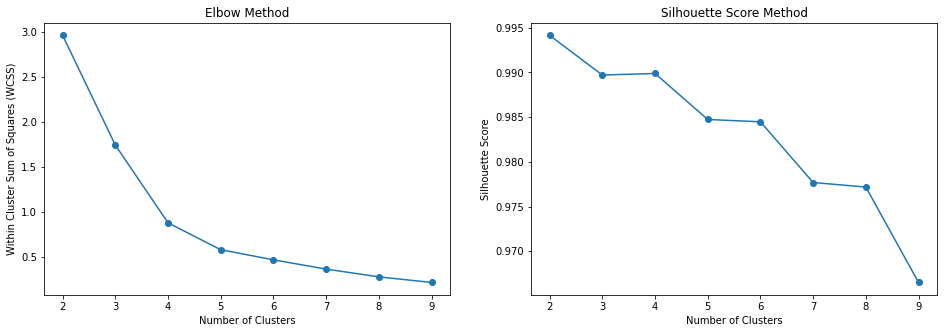

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,10)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,10)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

In [22]:
clf_final=KMeans(n_clusters=4,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=4, random_state=6)

In [23]:
df["Clusters"]=clf_final.predict(X)

In [24]:
cluster_summary=pd.concat([df[df["Clusters"]==1].head(15),df[df["Clusters"]==2].head(15),df[df["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')

,No.,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Fasum Rusak,korban_jiwa,kerusakan,Clusters
ID Kabupaten,,,,,,,,,,,,,,,,
5320,876,04/04/2021,BANJIR,Kec. Sabu Barat Kec. Sabu Timur,SABU RAIJUA,NUSA TENGGARA TIMUR,nan,• Akibat hujan disertai angin kencang beberapa hari terakhir (cuaca ekstrim) yang terjadi di wilayah Prov. NTT,3,7,2,10372,1948,12,12320,1
5371,894,03/04/2021,BANJIR,Kec. Oebobo Kel. Oebobo Kel. Oebufu Kel. Oetete Kel. Fatululi Kel. Liliba Kel. TDM Kel. Kayu Putih Kec. Maulafa Kel. Maulafa Kel. Naikolan Kel. Oepura Kel. Sikumana Kel. Kolhua Kel. Naimata Kel. Fatukoa Kel. Bello Kel. Penfui Kec. Alak Kel. Penkase - Oeleta Kel. Manutapen Kel. Mantasi Kel. Nunhila Kel. Namosain Kel. Alak Kel. Naioni kel. Manulai II Kel. Batuplat Kel. Fatufeto Kel. Nunbaun Delha Kel. Nunbaun Sabu Kec. Kota Raja Kel. Bakunase Kel. Bakunase II Kel. Naikoten I Kel. Naikoten 2 Kel. Airnona Kel. Kuanino Kel. Nunleu Kel. Fontein Kec. Kelapa Lima Kel. Kelapa Lima Kel. Oesapa Kel. Oesapa Barat Kel. Oesapa Selatan Kel. Lasiana Kec. Kota Lama Kel. Pasir Panjang Kel. Nefonaek Kel. Oeba Kel. Fatubesi Kel. Merdeka Kel. Tode Kiser Kel. Solor Kel. Bonipoi Kel. LLBK Kel. Airmata,KOTA KUPANG,NUSA TENGGARA TIMUR,nan,•Akibat hujan dengan intensitas tinggi sehingga terjadi luapan sungai / kali,6,1,8,12692,1061,15,13753,1
5303,881,04/04/2021,BANJIR,Kec. Kupang Timur Ds. Oesao,KUPANG,NUSA TENGGARA TIMUR,nan,• Akibat curah hujan dengan intensitas tinggi sejak tanggal 2 – 4 April 2021 menyebabkan terjadinya banjir bandang di wilayah Oesao dan sekitarnya di Kec. Kupang Timur,12,3,26,11884,73,41,11957,2
5314,887,04/04/2021,BANJIR,Kec. Rote Timur Ds. Papela Ds. Oelasin Ds. Bebalain Ds. Daudolu Ds. Oesosole Kel. Namodale Kel. Mokdale,ROTE NDAO,NUSA TENGGARA TIMUR,nan,• Akibat hujan disertai angin kencang beberapa hari terakhir (cuaca ekstrim) yang terjadi di wilayah Prov. NTT,1,0,74,8760,207,75,8967,2
5321,888,04/04/2021,BANJIR,Kec. Malaka Tengah Ds. Naimana Ds. Fahiluka Ds. Kawalu Ds. Railor Ds. Bereliku Ds. Lawaku Ds. Kakaniuk Kec. Malaka Barat Ds. Motaain Ds. Oan Mane Ds. Sikun Ds. Fafoe Ds. Lasaen Ds. Umatoos Ds. Rabasa Ds. Rabasa Hariain Ds. Loofoun Ds. Naas Ds. Motaulun Ds. Maktihan Ds. Besikama Ds. Umalor Ds. Raimataus Kec. Weliman Ds. Forekmodok Ds. Lamudur Ds. Wederok Ds. Kleseleon Kec. Wewiku Ds. Halibasa Ds. Alkani Kec. Kobalima Ds. Lalekun Barat Kec. Lo Kufeu Ds. Fatoin Kec. Weliman Ds. Wederok Ds. Lamudur Ds. Forkmodok Ds. Kleseleon,MALAKA,NUSA TENGGARA TIMUR,nan,•Akibat meluapnya Sungai Benenai dikernakan hujan dengan intensitas tinggi.,11,0,8,3727,109,19,3836,2
5206,896,02/04/2021,BANJIR,Kec. Madapangga Ds. Campa Ds. woro Ds. Tonda Ds. Dena Ds. Ncandi Ds. Rade Kec. Bolo Ds. Tambe Ds. Rasabou Ds. Leu Ds. Bontokape Ds. Nggembe Ds. Kananga Ds. Rato Ds. Timu Kec. Woha Ds. Naru Ds. Nisa Ds. Rabakodo Ds. Tenga Ds. Tente Ds. Waduwani Ds. Talabiu Ds. Pena Pali Ds. Donggo Bolo Kec. Monta Ds. Baralau Ds. Simpasai Ds. Sie Ds. Sakuru Ds. Pela Ds. Tangga Ds. Monta,BIMA,NUSA TENGGARA BARAT,nan,"Hujan turun selama 9 jam mulai lamanya yang menguyur di seluruh wilayah Kab. Bima, sehingga sekitar pukul 15:00 WITA Bendungan yang ada di kec. Madapangga, Bolo, Woha dan Monta sudah tidak dapat menahan debit air dan meluap hingga menggenangi lahan persawahan dan perkmpungan warga kabupaten Bima, sampai dengan pukul 22:45 WITA banjir masih menerjangan pemukiman warga.",2,0,0,5698,177,2,5875,2
7322,1921,13/07/2020,BANJIR,Kec. Masamba Kec. Sabbang Kec. Baebunta Kec. Baebunta Selatan Kec. Malangke Kec. Malangke Barat,LUWU UTARA,SULAWESI SELATAN,nan,"• Hujan dengan intensitas tinggi dan meluapnya sungai Masamba, Rongkang dan sungai radda",39,9,106,4037,51,154,4088,2
7107,2462,04/03/2020,BANJIR,Kec. Sangkub Kec. Bintauna Kec. Bolangitang Timur Kec. Bolangitang Barat Kec. Kaidipang Kec. Pinogaluman,BOLAANG MONGONDOW UTARA,SULAWESI UTARA,nan,• Akibat hujan dengan intensitas tinggi menyebabkan salah satu

In [25]:
print("Cluster 0: ",list(df[df["Clusters"]==0].head(100).Kabupaten))
print("Cluster 1: ",list(df[df["Clusters"]==1].head(100).Kabupaten))
print("Cluster 2: ",list(df[df["Clusters"]==2].head(100).Kabupaten))
print("Cluster 3: ",list(df[df["Clusters"]==3].head(100).Kabupaten))

Cluster 0:  ['OGAN KOMERING ULU', 'ACEH UTARA', 'LANGKAT', 'PADANG LAWAS', 'KOTA SEMARANG', 'TOBA', 'PAMEKASAN', 'KOTA LANGSA', 'ACEH TIMUR', 'ROKAN HILIR', 'LAMPUNG TIMUR', 'PENUKAL ABAB LEMATANG ILIR', 'BOGOR', 'KARAWANG', 'BOJONEGORO', 'PENAJAM PASER UTARA', 'BANDUNG', 'KARAWANG', 'LAMPUNG TIMUR', 'MUARA ENIM', 'SUMBA TENGAH', 'SUMBA BARAT', 'BOJONEGORO', 'BREBES', 'SERANG', 'ROKAN HULU', 'INDRAGIRI HULU', 'TANGGAMUS', 'PESAWARAN', 'GARUT', 'KOTA PALEMBANG', 'KOTA CILEGON', 'KOTA CIREBON', 'SUMEDANG', 'BELU', 'BANDUNG', 'PENAJAM PASER UTARA', 'BANDUNG', 'SUKABUMI', 'PASAMAN', 'MADIUN', 'KOTA SURAKARTA', 'PURWAKARTA', 'PENUKAL ABAB LEMATANG ILIR', 'ACEH SELATAN', 'BIMA', 'SERANG', 'NAGAN RAYA', 'KOTA MEDAN', 'BOGOR', 'SUBANG', 'TAPIN', 'NGANJUK', 'KOTA JAKARTA BARAT', 'MESUJI', 'BANDUNG', 'KOTA SABANG', 'BOGOR', 'LUMAJANG', 'KOTA KEDIRI', 'ACEH TENGAH', 'ACEH JAYA', 'ACEH BARAT', 'MAMUJU', 'TAPIN', 'KUTAI TIMUR', 'DOMPU', 'PONOROGO', 'TAPANULI SELATAN', 'NIAS', 'KEDIRI', 'PADANG PARI

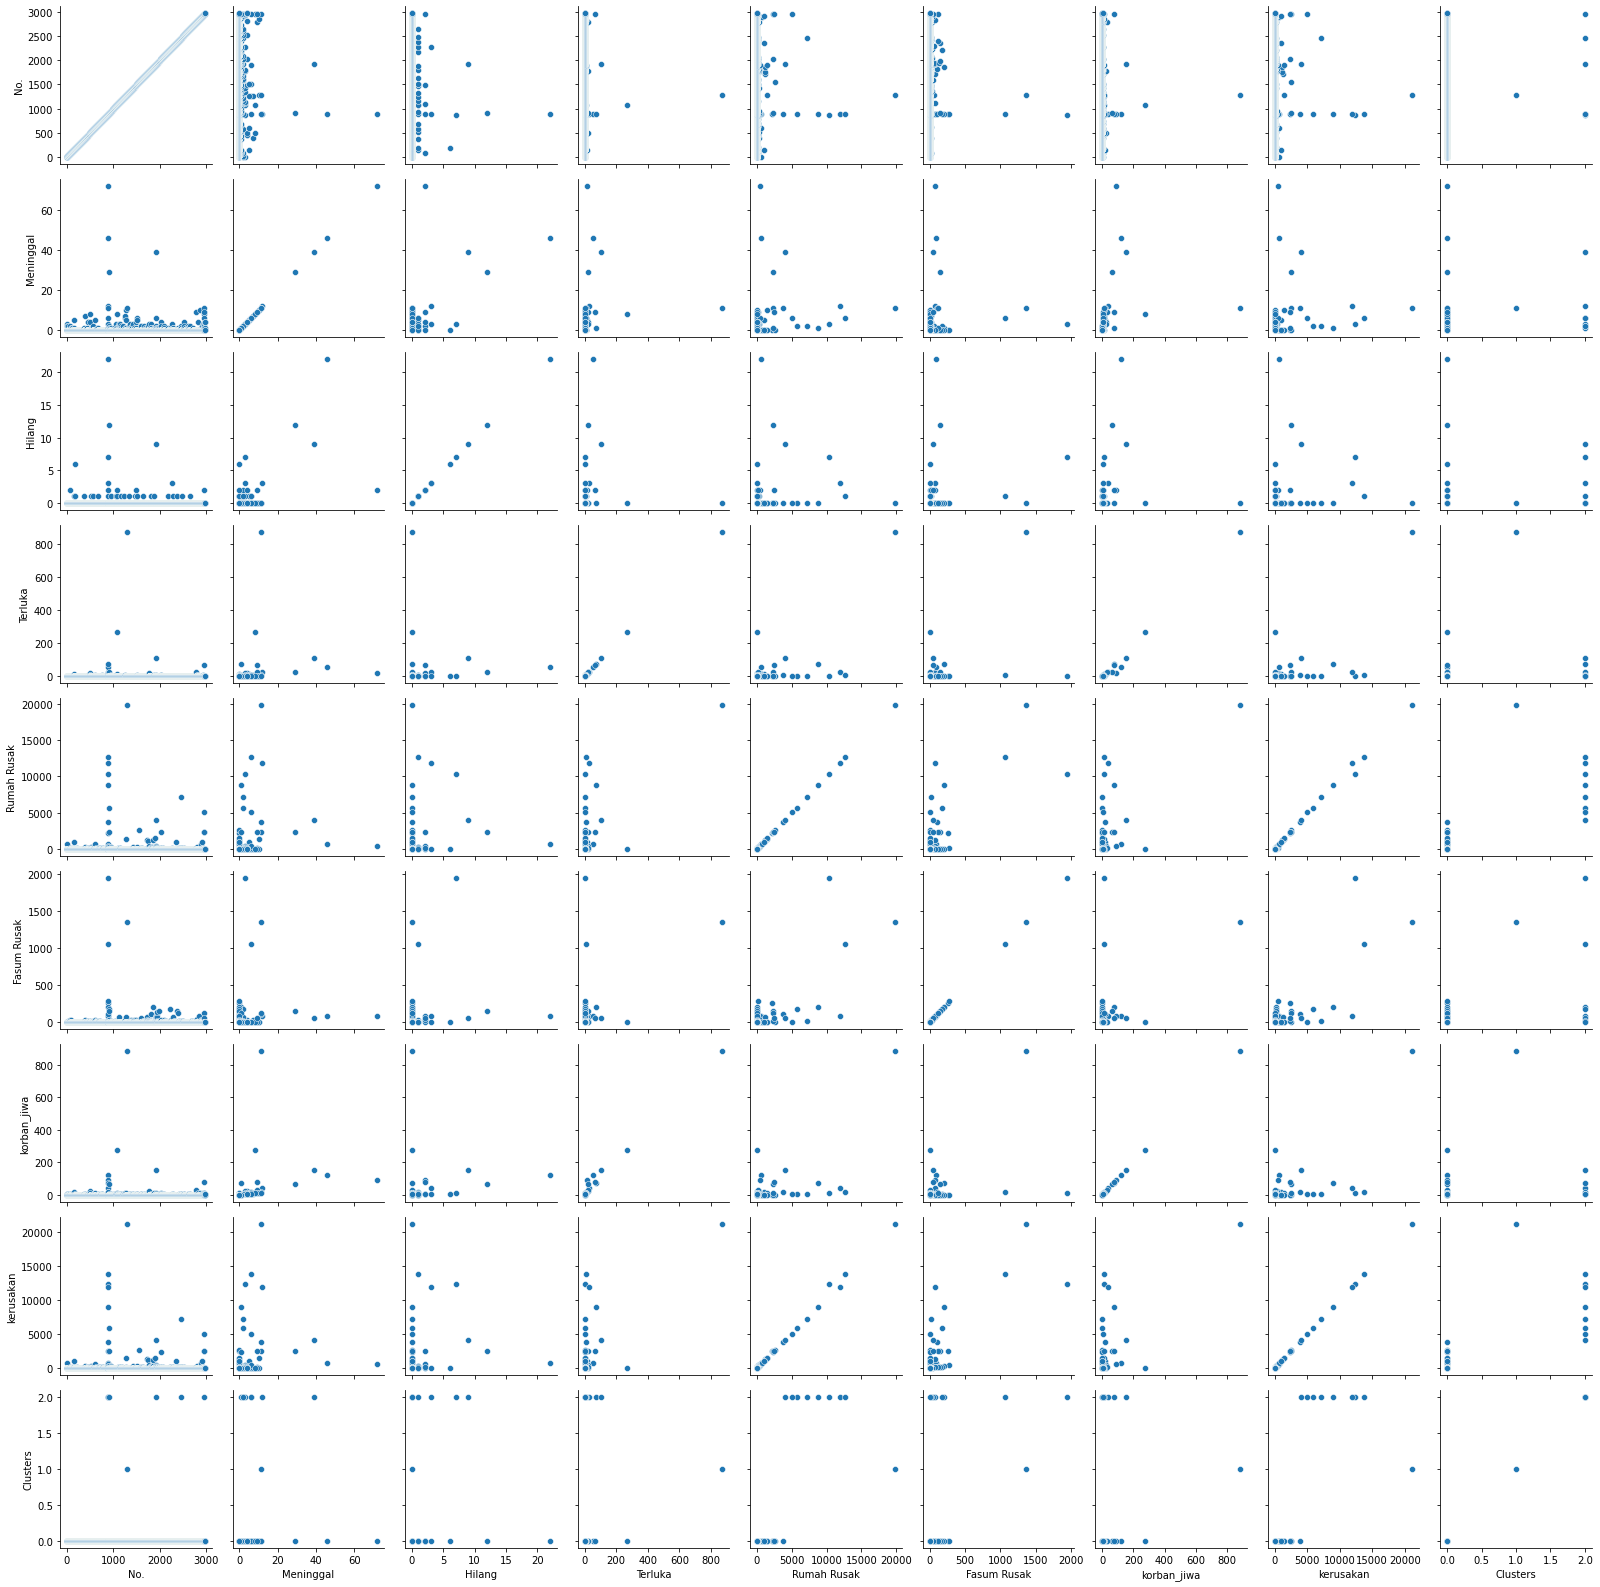

In [24]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

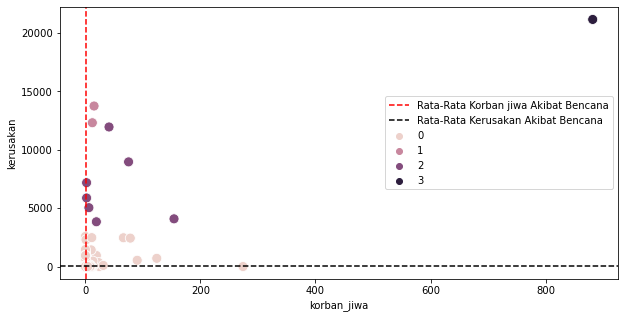

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["korban_jiwa"],y=df["kerusakan"],hue=df["Clusters"],s=100)
plt.axvline((df["korban_jiwa"]).mean(),color='red',linestyle="--",label="Rata-Rata Korban jiwa Akibat Bencana")
plt.axhline((df["kerusakan"]).mean(),color='black',linestyle="--",label="Rata-Rata Kerusakan Akibat Bencana")
plt.legend()

In [27]:
print("Rata-Rata Korban jiwa Akibat Bencana of Cluster 0: ",df[df["Clusters"]==0]["korban_jiwa"].mean())
print("Rata-Rata Kerusakan Akibat Bencana of Cluster 0: ",df[df["Clusters"]==0]["kerusakan"].mean())
print("Rata-Rata Korban jiwa Akibat Bencana of Cluster 1: ",df[df["Clusters"]==1]["korban_jiwa"].mean())
print("Rata-Rata Kerusakan Akibat Bencana of Cluster 1: ",df[df["Clusters"]==1]["kerusakan"].mean())
print("Rata-Rata Korban jiwa Akibat Bencana of Cluster 2: ",df[df["Clusters"]==2]["korban_jiwa"].mean())
print("Rata-Rata Kerusakan Akibat Bencana of Cluster 2: ",df[df["Clusters"]==2]["kerusakan"].mean())
print("Rata-Rata Korban jiwa Akibat Bencana of Cluster 3: ",df[df["Clusters"]==3]["korban_jiwa"].mean())
print("Rata-Rata Kerusakan Akibat Bencana of Cluster 3: ",df[df["Clusters"]==3]["kerusakan"].mean())

Rata-Rata Korban jiwa Akibat Bencana of Cluster 0:  0.39858012170385393
Rata-Rata Kerusakan Akibat Bencana of Cluster 0:  14.125084516565247
Rata-Rata Korban jiwa Akibat Bencana of Cluster 1:  13.5
Rata-Rata Kerusakan Akibat Bencana of Cluster 1:  13036.5
Rata-Rata Korban jiwa Akibat Bencana of Cluster 2:  42.714285714285715
Rata-Rata Kerusakan Akibat Bencana of Cluster 2:  6707.285714285715
Rata-Rata Korban jiwa Akibat Bencana of Cluster 3:  882.0
Rata-Rata Kerusakan Akibat Bencana of Cluster 3:  21169.0


In [28]:
df_cluster=df.assign(cluster = clf_final.predict(X))

In [30]:
fig = px.treemap(df, path=["Kabupaten"],values="kerusakan", height = 750,
                 title="Jumlah Kerusakan di Kabupaten Akibat Dampak Bencana",
                 color_discrete_sequence = px.colors.qualitative.Set3)

fig.update_traces(textinfo = "label+text+value")
fig.show()

In [31]:
fig = px.treemap(df, path=["Kabupaten"],values="korban_jiwa", height = 750,
                 title="Jumlah Korban Jiwa di Kabupaten Akibat Dampak Bencana",
                 color_discrete_sequence = px.colors.qualitative.Set3)

fig.update_traces(textinfo = "label+text+value")
fig.show()